### 분석에 필요한 methods 불러오기

In [10]:
import pandas as pd
import numpy as np

### 1. 데이터 확인하기

In [3]:
#판다스 데이터 불러오기
gapminder = pd.read_csv('C:/Users/user/Jupyter/dataset/pandas/gapminder.tsv', sep='\t') 
# tsv 데이터셋은 tab으로 구분되어 있으니까 sep 속성 넣어줘야함

In [7]:
# head 통해서 앞의 값들을 알아보고
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
#shape로 자료 형태 보고
gapminder.shape

(1704, 6)

In [8]:
#columns로 변수명은 어떤것들이 있는지 살펴보고
gapminder.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [9]:
#전체적인 정보는 info를 통해 볼 수 있음
gapminder.info

<bound method DataFrame.info of           country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]>

### 2. 데이터 추출하기

In [13]:
# 특정 열만 추출하고 싶을때
country = gapminder['country']
country.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [14]:
# 여러개의 열을 추출하고 싶다면 컴마로 묶어서 주면 됨. 대신 괄호도 두개
subdata = gapminder[['country','continent','year']]
subdata.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [15]:
# 원하는 행에 대해서, 행 단위로 추출하려면 loc, iloc을 잘 사용하자
# loc : 인덱스를 기준으로 행 데이터 추출
# iloc: 행 번호를 기준으로 행 데이터 추출

In [17]:
# 예를들어 0번째 인덱스 행에 대한 정보를 원한다면
gapminder.loc[0] 

country      Afghanistan
continent           Asia
year                1952
lifeExp        28.801000
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [19]:
#마지막 행이 몇번째인지 알아낸 후에 그 행 데이터를 추출하려면
row_num = gapminder.shape[0]
last_row = row_num - 1
gapminder.loc[last_row]

country        Zimbabwe
continent        Africa
year               2007
lifeExp       43.487000
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

In [22]:
#위에처럼 하던지 아니면 tail에서 1개 뽑는 형태로 이렇게 하던지
gapminder.tail(1) #그러면 몇번째 인덱스인지도 알 수 있으니까 더 좋을수도

,country,continent,year,lifeExp,pop,gdpPercap
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [23]:
#우리가 궁금한 여러개의 행을 뽑아서 보고싶다면 [] 로 묶어서 달라고 하면 됨. loc쓰고.
gapminder.loc[[0, 50, 100, 200, 300]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
50,Argentina,Americas,1962,65.142,21283783,7133.166023
100,Bangladesh,Asia,1972,45.252,70759295,630.233627
200,Burkina Faso,Africa,1992,50.260,8878303,931.752773
300,Colombia,Americas,1952,50.643,12350771,2144.115096


In [26]:
# iloc을 쓰면 데이터 순서를 의미하는 행 번호를 사용해서 데이터를 추출함
gapminder.iloc[1]

country      Afghanistan
continent           Asia
year                1957
lifeExp         30.33200
pop              9240934
gdpPercap      820.85303
Name: 1, dtype: object

In [28]:
# loc에서는 음수값을 주면 추출이 안되었는데 iloc은 뒤에서부터 추출하라는 명령이 된다.
gapminder.iloc[-1]

country        Zimbabwe
continent        Africa
year               2007
lifeExp       43.487000
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

In [31]:
# 슬라이싱을 통해서 우리가 원하는 데이터들을 골라서 쓸 수 있는 연습을 해보자
subdata = gapminder.loc[:, ['year', 'pop']]
subdata.head()

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460


In [32]:
subdata = gapminder.iloc[:, [2,4,-1]]
subdata.head()

,year,pop,gdpPercap
0,1952,8425333,779.445314
1,1957,9240934,820.853030
2,1962,10267083,853.100710
3,1967,11537966,836.197138
4,1972,13079460,739.981106


In [35]:
# range method를 써보자. 이거는 지정한 구간의 정수 리스트를 반환해준다.
# iloc속성은 generator로 데이터 추출을 할 수 없지만, generator는 간단하게 리스트로 변환할 수 있다.
#아래와 같이 range가 반환한 generator를 정숫값 리스트로 변환하여 iloc의 열 지정값에 전달이 가능하다
range1 = list(range(5))
print(type(range1))

subdata = gapminder.iloc[:, range1]
subdata.head()

<class 'list'>


,country,continent,year,lifeExp,pop
0,Afghanistan,Asia,1952,28.801,8425333
1,Afghanistan,Asia,1957,30.332,9240934
2,Afghanistan,Asia,1962,31.997,10267083
3,Afghanistan,Asia,1967,34.020,11537966
4,Afghanistan,Asia,1972,36.088,13079460


In [36]:
range2 = list(range(0, 6, 2)) #0부터 5까지 2개씩 건너뛰는 generator
subdata = gapminder.iloc[:, range2]
subdata.head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [39]:
# 실무에서는 range 보다는 slicing 구문을 더 선호하기는 한다.
# iloc과 loc을 사용해서 데이터를 다뤄보자
print(gapminder.iloc[[0, 50, 100, 200, 300], [0, 3, 5]])

          country  lifeExp    gdpPercap
0     Afghanistan   28.801   779.445314
50      Argentina   65.142  7133.166023
100    Bangladesh   45.252   630.233627
200  Burkina Faso   50.260   931.752773
300      Colombia   50.643  2144.115096


In [40]:
print(gapminder.loc[[0, 50,100,200,300], ['country', 'lifeExp','gdpPercap']])

          country  lifeExp    gdpPercap
0     Afghanistan   28.801   779.445314
50      Argentina   65.142  7133.166023
100    Bangladesh   45.252   630.233627
200  Burkina Faso   50.260   931.752773
300      Colombia   50.643  2144.115096


### 3. Statistics

In [41]:
# 우리가 원하는 열에 대해서 그룹화 평균값을 계산하려면?
gapminder.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [43]:
# 단계별로 나누어서 확인해보자
grouped_year = gapminder.groupby('year') #그룹별로 저장이 되었고
grouped_year#확인해보면 데이터프레임 형태로 저장되어있음

In [45]:
grouped_year_life = grouped_year['lifeExp'] #연도별로 그룹화한 시리즈를 얻을 수 있다
type(grouped_year_life)

pandas.core.groupby.generic.SeriesGroupBy

In [46]:
mean_life_year_group = grouped_year_life.mean()
mean_life_year_group

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [47]:
# 그러면 한 개의 열 말고 여러개의 열의 평균값을 다양한 기준으로 그룹화해서 한번에 계산하려면?
# 한번 year,continent열로 그룹화한다음 여기서 lifeExp, gdpPercap만 추출하여 평균값 구해보자
multi_group_process = gapminder.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()
multi_group_process

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

In [49]:
# 그룹화한 데이터에, 각각의 그룹에 몇가지 원소를 가지고 있는지 세보자 = 빈도수
# continent기준으로 DF만들고 country열만 추출해서 카운트 하는거다
gapminder.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

### 4. 간단한 그래프

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

In [51]:
# year를 기준으로 그룹화한 df에서 lifeExp 열 평균값 구하기
year_life = gapminder.groupby('year')['lifeExp'].mean()
print(year_life)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


<AxesSubplot:xlabel='year'>

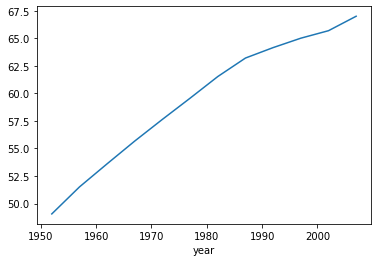

In [52]:
year_life.plot()